# Reloading ipynb

In [9]:
#%load_ext autoreload
%autoreload 2

# Imports 

In [9]:
from pathlib import Path
import numpy as np

from src.constants import TARGET_COL_HEART, TARGET_COL_POPULARITY
from src.data_utils import load_data, split_features_target, get_column_types , inspect_dataframe
from src.eda_utils import (numeric_summary, categorical_summary,
                           boxplots, countplots, plot_class_balance,
                           pearson_heatmap, chi2_categorical, eda_memo)

from src.preprocess_utils import (
    drop_redundant_features,
    build_preprocessor,
    encode_target
)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import joblib

from src.decision_tree_model import make_pipeline as make_dt
from src.random_forest_model import make_pipeline as make_rf
from src.logistic_regression_model import make_pipeline as make_lr
from src.mlp_model import make_pipeline as make_mlp

import pandas as pd


pd.set_option('display.max_rows', 100)

MODELS = {
    "DecisionTree": make_dt,
    "RandomForest": make_rf,
    "LogisticRegression": make_lr,
    "MLP": make_mlp,
}


## Load Datasets

In [10]:
DATA_DIR = Path("data")
REPORTS_DIR = Path("reports")

df_train = load_data('data/heart_1_train.csv')
df_test  = load_data('data/heart_1_test.csv')
df_full  = load_data('data/heart_full.csv')

df_train_news = load_data('data/news_popularity_train.csv')
df_test_news  = load_data('data/news_popularity_test.csv')
df_full_news  = load_data('data/news_popularity_full.csv')

inspect_dataframe (df_train)


                Variables    Type  Missing Values
blood_pressure_medication float64              44
        cholesterol_level float64             362
           stroke_history   int64               0
        systolic_pressure float64               0
     hypertension_history   int64               0
         daily_cigarettes float64              23
       diastolic_pressure float64               0
               heart_rate float64               1
           smoking_status float64             339
         diabetes_history   int64               0
               mass_index float64              18
        blood_sugar_level float64             321
                      age float64               0
          education_level float64              82
                   gender   int64               0
                  glucose float64             321
         total_cigarettes float64              23
         high_blood_sugar   int64               0
                 chd_risk   int64               0


,Variables,Type,Missing Values
0,blood_pressure_medication,float64,44
1,cholesterol_level,float64,362
2,stroke_history,int64,0
3,systolic_pressure,float64,0
4,hypertension_history,int64,0
5,daily_cigarettes,float64,23
6,diastolic_pressure,float64,0
7,heart_rate,float64,1
8,smoking_status,float64,339
9,diabetes_history,int64,0


# Spliting datasets

In [11]:
X_train, y_train = split_features_target(df_train, TARGET_COL_HEART)
X_test,  y_test  = split_features_target(df_test,  TARGET_COL_HEART)
#X_full,  y_full  = split_features_target(df_full,  TARGET_COL_HEART)


X_train_news, y_train_news = split_features_target(df_train_news, TARGET_COL_POPULARITY)
X_test_news,  y_test_news  = split_features_target(df_test_news,  TARGET_COL_POPULARITY)
#X_full_news,  y_full_news  = split_features_target(df_full_news,  TARGET_COL_POPULARITY)

num_cols, cat_cols = get_column_types(X_train, cat_threshold=5)

#num_cols, cat_cols = get_column_types(X_test, cat_threshold=5)

# num_cols, cat_cols = get_column_types(X_train_news, cat_threshold=10)

# num_cols, cat_cols = get_column_types(X_test_news, cat_threshold=10)

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['cholesterol_level', 'systolic_pressure', 'daily_cigarettes', 'diastolic_pressure', 'heart_rate', 'mass_index', 'blood_sugar_level', 'age', 'glucose', 'total_cigarettes']
Categorical: ['blood_pressure_medication', 'stroke_history', 'hypertension_history', 'smoking_status', 'diabetes_history', 'education_level', 'gender', 'high_blood_sugar']


# Summaris

In [15]:
num_stats = numeric_summary(X_train[num_cols])
cat_stats = categorical_summary(X_train, cat_cols)

print (num_stats)
print('\n')
print(cat_stats)

                     count         mean          std         min         25%  \
feature                                                                        
cholesterol_level   3030.0   236.782178    44.432552  107.000000  206.000000   
systolic_pressure   3392.0   132.439858    22.036161   83.500000  117.000000   
daily_cigarettes    3369.0     9.020184    11.937419    0.000000    0.000000   
diastolic_pressure  3392.0    82.884139    11.893920   48.000000   74.500000   
heart_rate          3391.0    75.891477    12.010738   44.000000   68.000000   
mass_index          3374.0    25.826906     4.126818   15.540000   23.090000   
blood_sugar_level   3071.0    81.963530    24.098494   40.000000   71.000000   
age                 3392.0    51.615613    14.050599   32.000000   43.000000   
glucose             3071.0    65.570948    19.283811   32.167909   56.852999   
total_cigarettes    3369.0  3444.161536  4121.565152    0.000000   32.546826   

                            50%        

# Visuals

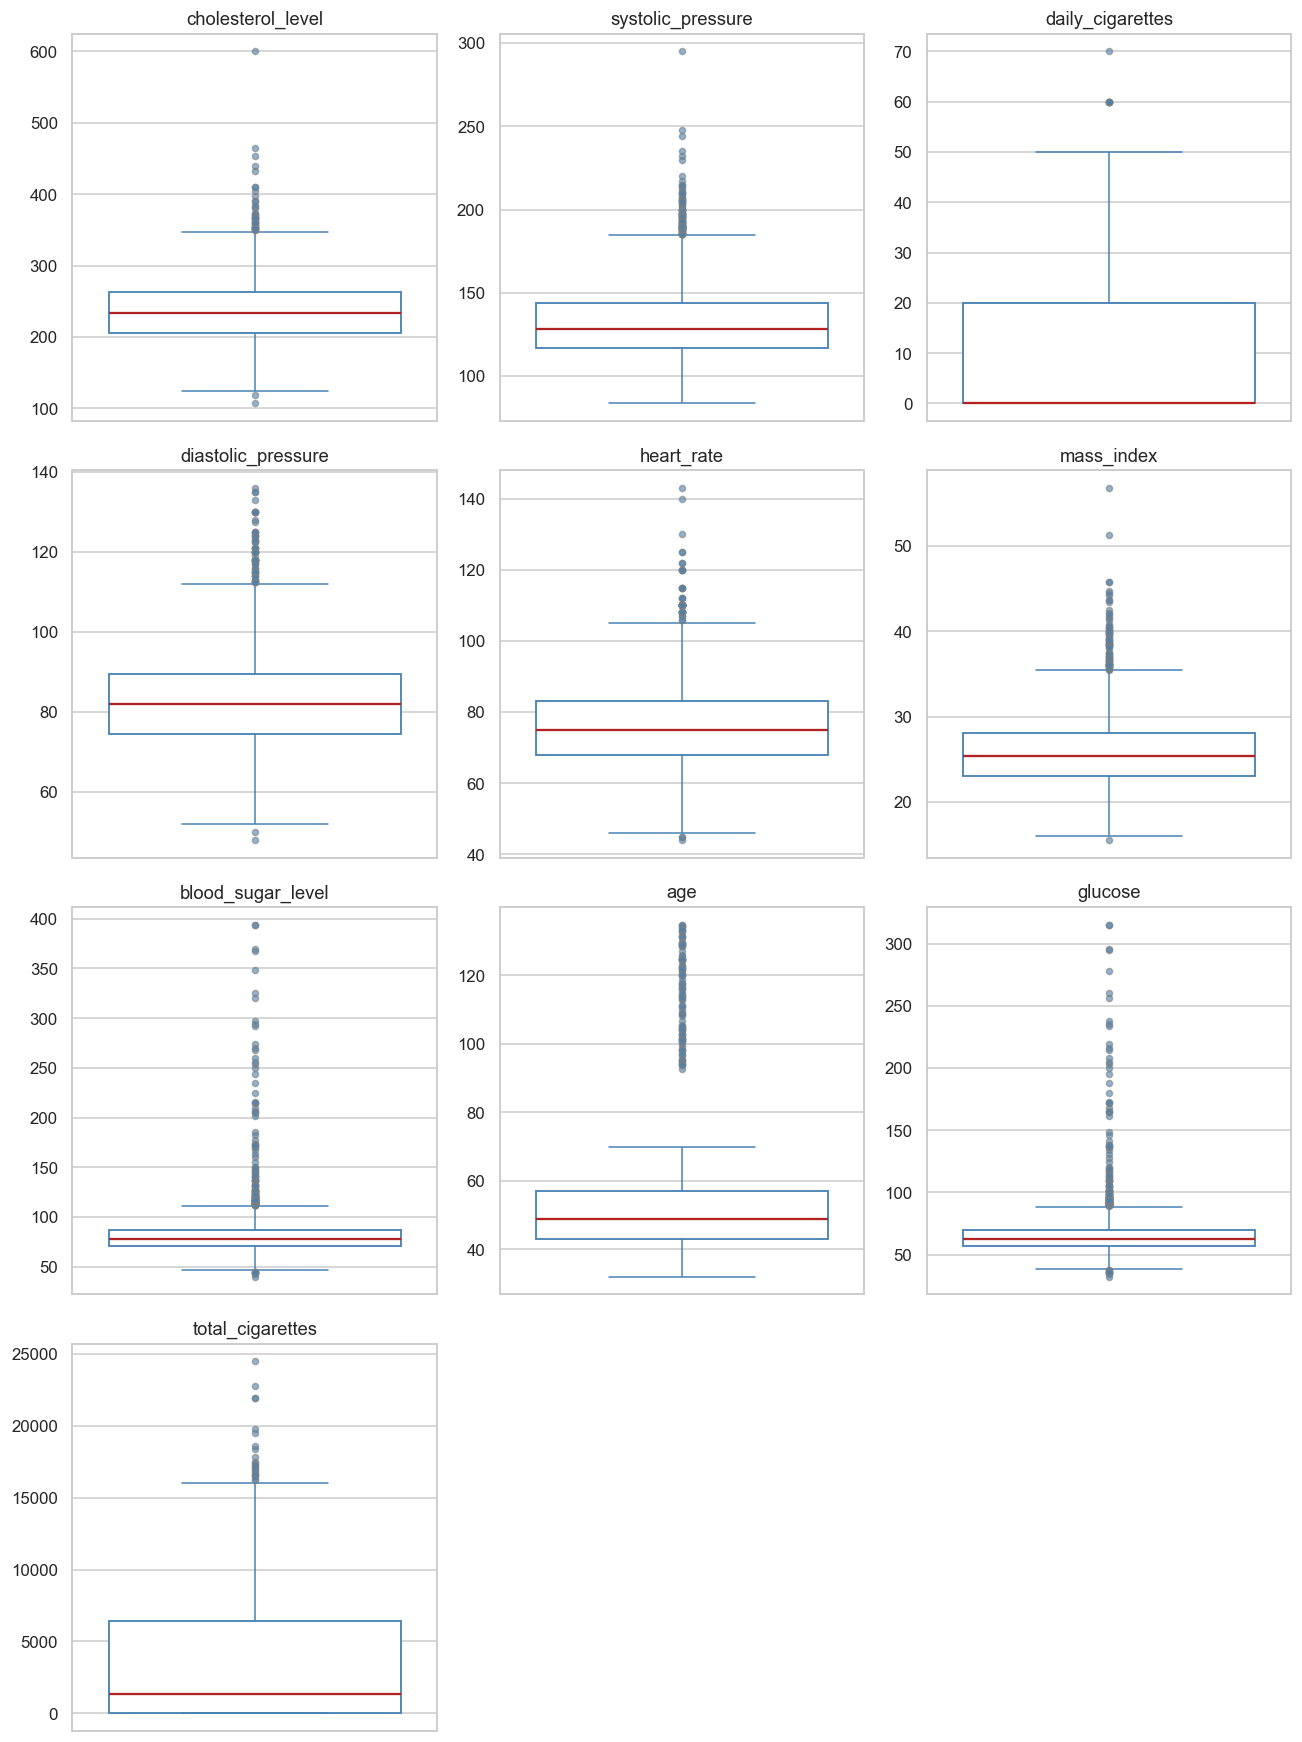

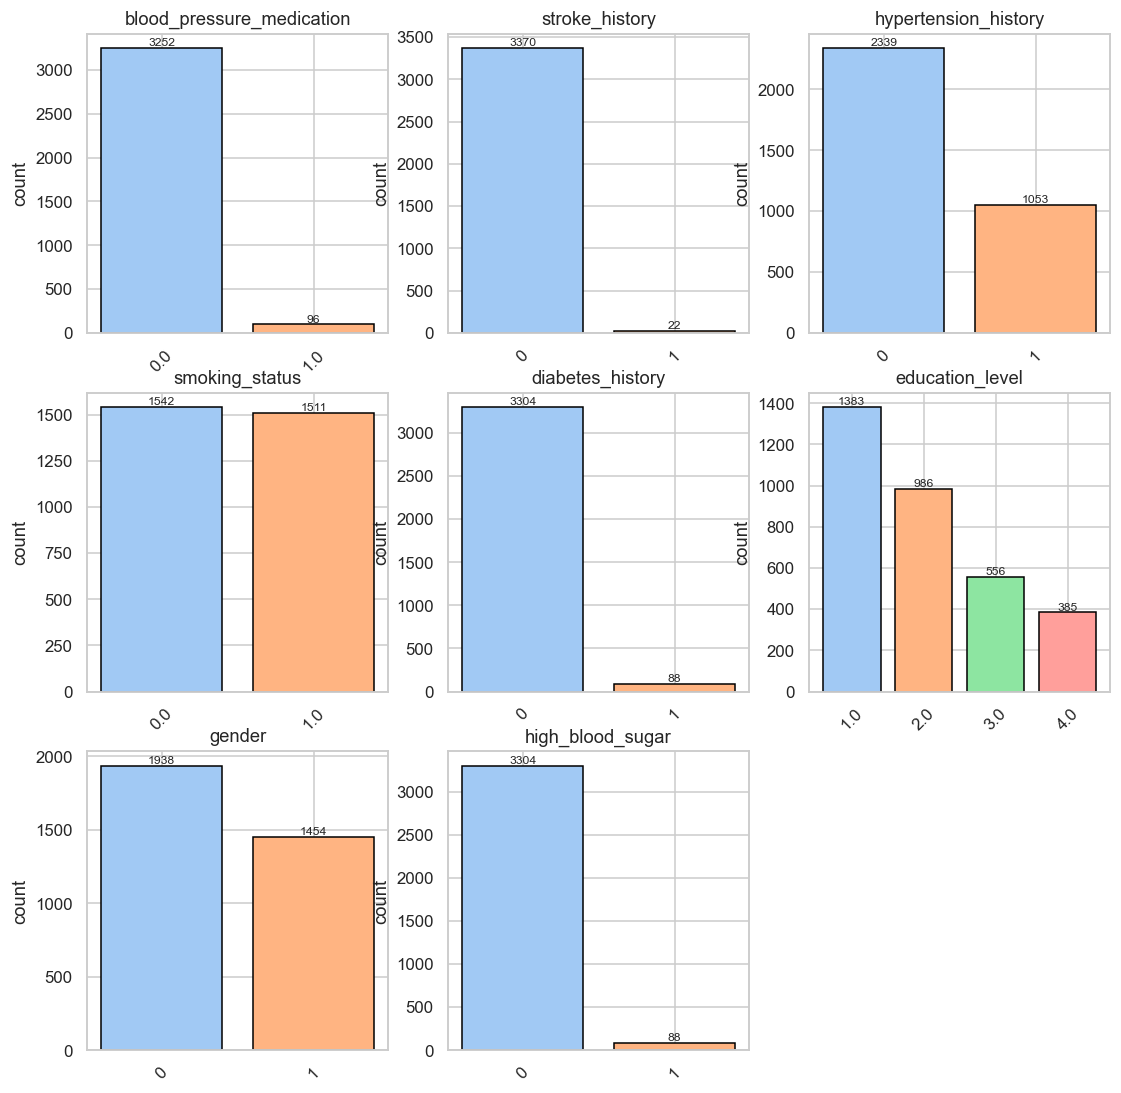

In [6]:
boxplots(X_train, num_cols, save_dir=REPORTS_DIR)
countplots(X_train, cat_cols, save_dir=REPORTS_DIR)

# boxplots(X_test, num_cols, save_dir=REPORTS_DIR)
# countplots(X_test, cat_cols, save_dir=REPORTS_DIR)

# boxplots(X_train_news, num_cols, save_dir=REPORTS_DIR)
# countplots(X_train_news, cat_cols, save_dir=REPORTS_DIR)

# boxplots(X_test_news, num_cols, save_dir=REPORTS_DIR)
# countplots(X_test_news, cat_cols, save_dir=REPORTS_DIR)

# Balancing

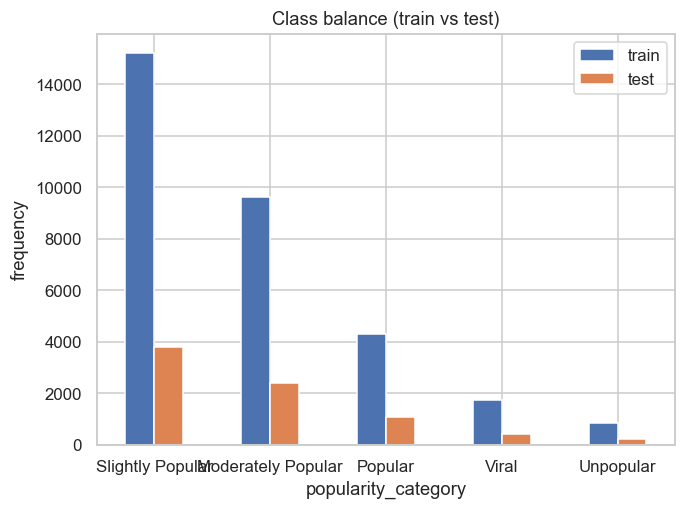

In [7]:
#plot_class_balance(y_train, y_test, save_dir=REPORTS_DIR)

plot_class_balance(y_train_news, y_test_news, save_dir=REPORTS_DIR)

# Corelation

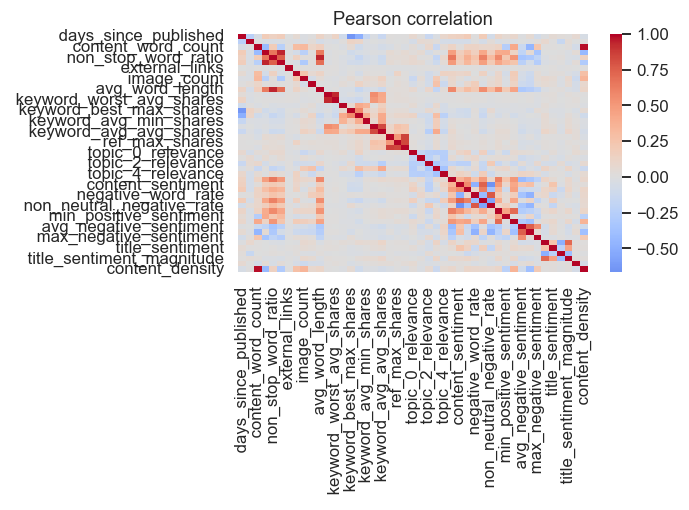

In [5]:
# corr_mat = pearson_heatmap(X_train, num_cols, save_dir=REPORTS_DIR)
# chi2_df = chi2_categorical(
#    X_train, cat_cols,
#    save_path=str(REPORTS_DIR / "chi2_categorical.csv")
# )

# corr_mat = pearson_heatmap(X_test, num_cols, save_dir=REPORTS_DIR)
# chi2_df = chi2_categorical(
#     X_test, cat_cols,
#     save_path=str(REPORTS_DIR / "chi2_categorical.csv")
# )

# corr_mat = pearson_heatmap(X_train_news, num_cols, save_dir=REPORTS_DIR)
# chi2_df = chi2_categorical(
#    X_train_news, cat_cols,
#    save_path=str(REPORTS_DIR / "chi2_categorical.csv")
# )


corr_mat = pearson_heatmap(X_test_news, num_cols, save_dir=REPORTS_DIR)
chi2_df = chi2_categorical(
    X_test_news, cat_cols,
    save_path=str(REPORTS_DIR / "chi2_categorical.csv")
)

# memo

In [ ]:
# memo = eda_memo(num_stats, cat_stats,
#                 pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1),
#                 corr_mat, chi2_df)
# print(memo) 

memo = eda_memo(num_stats, cat_stats,
                pd.concat([y_train_news.value_counts(), y_test_news.value_counts()], axis=1),
                corr_mat, chi2_df)
print(memo) 

Potential outliers in: cholesterol_level, systolic_pressure, daily_cigarettes, diastolic_pressure, heart_rate, mass_index, blood_sugar_level, age, glucose, total_cigarettes.
High collinearity among: daily_cigarettes, blood_sugar_level, glucose, total_cigarettes.
Some categorical features show strong dependencies.


# Preprocessing


In [12]:

# 1. Drop redundant numeric features
to_drop = drop_redundant_features(X_train[num_cols], threshold=0.9)
X_train = X_train.drop(columns=to_drop)
X_test  = X_test.drop(columns=to_drop)
num_cols = [c for c in num_cols if c not in to_drop]


In [13]:
# 2. Build and apply preprocessing pipeline
preprocessor = build_preprocessor(num_cols, cat_cols)
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# 3. Encode target labels
y_train_enc, label_encoder = encode_target(y_train)
y_test_enc  = label_encoder.transform(y_test)


# 3.3

In [ ]:
results = {}
best_estimators = {}

for name, builder in MODELS.items():
    pipe, grid = builder(num_cols, cat_cols)
    gs = GridSearchCV(pipe, grid, cv=5, n_jobs=-1,
                      scoring="accuracy", verbose=0)
    gs.fit(X_train, y_train_enc)
    y_pred = gs.predict(X_test)

    best_params = gs.best_params_
    class_names = [str(c) for c in label_encoder.classes_]
    report = classification_report(y_test_enc, y_pred,
                                   target_names=class_names)
    matrix = confusion_matrix(y_test_enc, y_pred)


    txt_path = Path("reports") / f"{name.lower()}_best.txt"
    with txt_path.open("w", encoding="utf-8") as f:
        f.write(f"=== {name} ===\n")
        f.write(f"Best params: {best_params}\n\n")
        f.write("Classification report:\n")
        f.write(report + "\n\n")
        f.write("Confusion matrix:\n")
        f.write(np.array2string(matrix) + "\n")


    print(f"\nSaved results for {name} -> {txt_path}")

    results[name] = gs.cv_results_
    best_estimators[name] = gs.best_estimator_


Saved results for DecisionTree -> reports\decisiontree_best.txt

Saved results for RandomForest -> reports\randomforest_best.txt


c:\Users\Andrei\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Saved results for LogisticRegression -> reports\logisticregression_best.txt

Saved results for MLP -> reports\mlp_best.txt
